In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df["ph"].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [9]:
df["ph"].fillna(df["ph"].median(),inplace=True)

In [10]:
df["Sulfate"].fillna(df["Sulfate"].median(),inplace=True)

In [11]:
df["Trihalomethanes"].fillna(df["Trihalomethanes"].median(),inplace=True)

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

**🔹 Summary of Data Cleaning:**
- **Filled missing values in `ph` column using median imputation.**
- **Filled missing values in `Sulfate` column using median imputation.**
- **Filled missing values in `Trihalomethanes` column using median imputation.**
- **Verified no duplicate rows — dataset is clean.**
- **Final dataset shape after cleaning: (3276, 10).**


----

### **EDA**

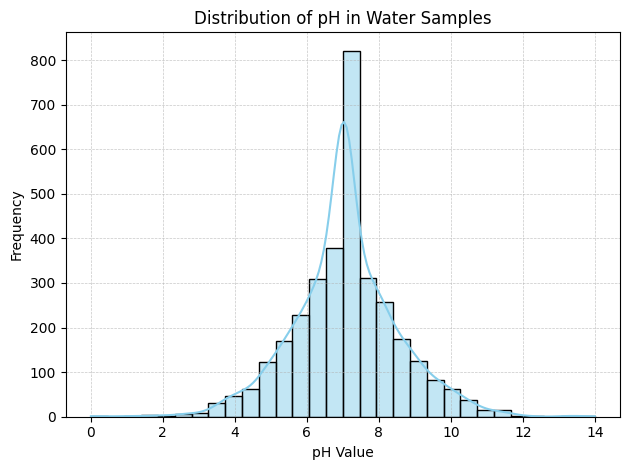

In [17]:
sns.histplot(data=df, x="ph", kde=True, bins=30, color="skyblue")
plt.title("Distribution of pH in Water Samples")
plt.xlabel("pH Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


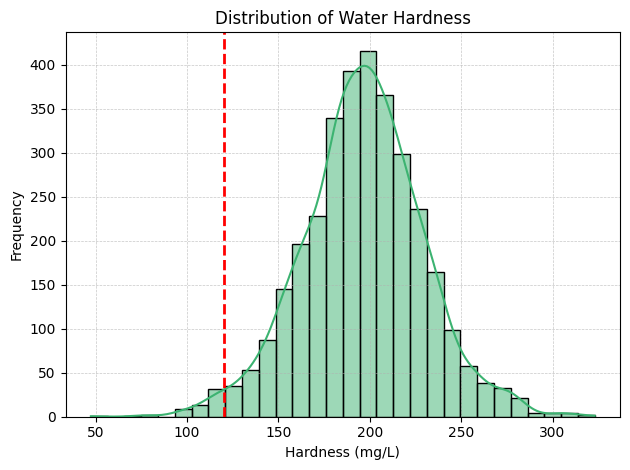

In [19]:
sns.histplot(data=df, x="Hardness", kde=True, bins=30, color="mediumseagreen")
plt.axvline(x=120, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Water Hardness")
plt.xlabel("Hardness (mg/L)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


**🔹 Summary of Hardness Distribution:**
- **The distribution appears Gaussian (bell-shaped), which may suggest a normal pattern.**
- **However, the majority of values are centered around 180–200 mg/L, which exceeds the safe limit (60–120 mg/L).**
- **A red dashed line at 120 mg/L is added to visually mark the upper bound of the safe hardness range.**
- **Despite the statistical normality, the values themselves are abnormally high for potable water.**
- **This level of hardness can negatively impact both human health and water infrastructure.**


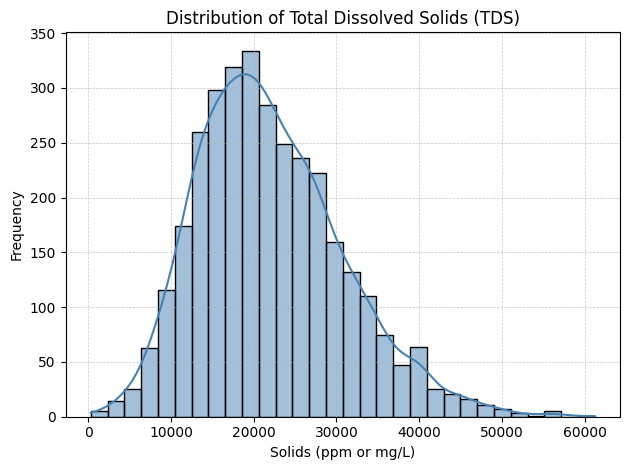

In [ ]:
sns.histplot(data=df, x="Solids", kde=True, bins=30, color="steelblue")
plt.title("Distribution of Total Dissolved Solids (TDS)")
plt.xlabel("Solids (ppm or mg/L)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  
plt.show()


**🔹 Summary of Solids (TDS) Distribution:**
- **The distribution visually appears Gaussian (bell-shaped), indicating a statistically 'normal' pattern.**
- **However, the majority of values fall in the range of 10,000 to 30,000 mg/L, which is extremely high.**
- **The safe range for Total Dissolved Solids (TDS) in potable water is approximately 50–300 mg/L.**
- **This means that even though the distribution looks ‘normal’, the actual levels are far beyond safe limits.**
- **Excessive TDS can negatively impact water taste, clarity, and may contain harmful minerals/metals.**


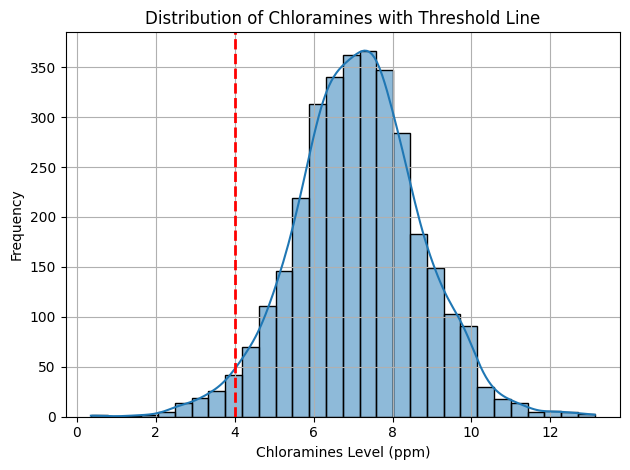

In [27]:
sns.histplot(data=df, x="Chloramines", kde=True, bins=30)
plt.axvline(x=4, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Chloramines with Threshold Line")
plt.xlabel("Chloramines Level (ppm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()


#### **Chloramines Distribution Summary**
- **The distribution of chloramines in the dataset forms a nearly perfect Gaussian (bell-shaped) curve.**
- **Safe chloramine levels in drinking water should be between 0–4 mg/L.**
- **A vertical red dashed line is drawn at 4 mg/L to represent the upper safety limit.**
- **Most of the water samples exceed this safety threshold, indicating possible over-treatment or contamination.**
- **Although the visual distribution appears normal, it is misleading without understanding the health-based limits.**
- **This reinforces the need to combine statistical visuals with domain-specific knowledge for accurate insights.**

---

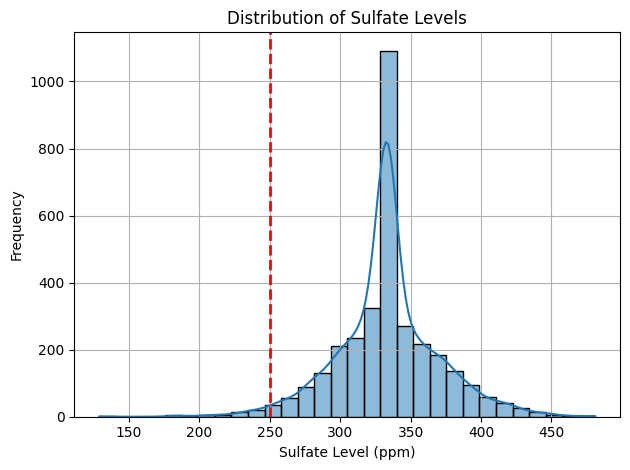

In [34]:
sns.histplot(data=df, x="Sulfate", bins=30, kde=True)
plt.axvline(x=250, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Sulfate Levels")
plt.xlabel("Sulfate Level (ppm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()


##### **📊 Sulfate Levels – Summary**

- **The distribution of sulfate levels appears slightly skewed but visually close to normal.**
- **The peak sulfate concentration is observed between 300–350 mg/L, especially around 330 mg/L.**
- **According to standard water safety guidelines, the safe sulfate range is between 0–250 mg/L.**
- **A red dashed line is drawn at 250 mg/L to visually mark the upper safe limit for sulfate.**
- **The majority of the dataset values fall above the safe range, indicating possible health concerns.**
- **Despite the Gaussian-like shape, the actual values show that sulfate levels are contextually unsafe.**
- **This highlights how EDA should combine visual interpretation with domain knowledge.**


---

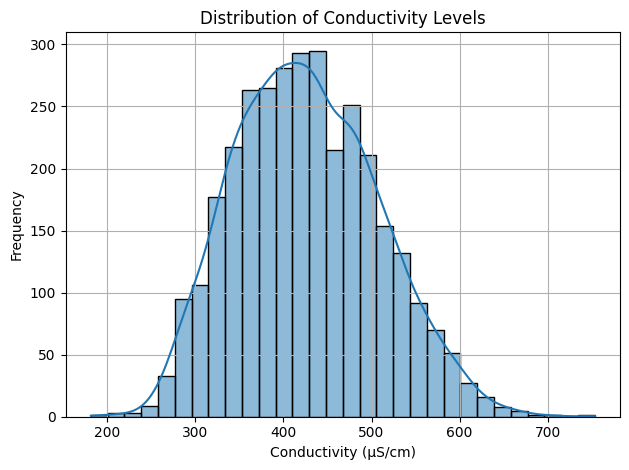

In [37]:
sns.histplot(data=df, x="Conductivity", kde=True, bins=30)
plt.title("Distribution of Conductivity Levels")
plt.xlabel("Conductivity (μS/cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()


##### **📊 Conductivity Levels – Summary**

- **The distribution of conductivity values shows a near-perfect Gaussian (normal) curve.**
- **Most readings lie between 300–500 µS/cm, with the peak frequency around 400–450 µS/cm.**
- **The standard safe conductivity range for drinking water is 50–500 µS/cm.**
- **This plot aligns well with the safety range, meaning most of the data points are within acceptable limits.**
- **Unlike previous features (e.g., Sulfate or Solids), this one visually and contextually supports safe water quality.**
- **This distribution provides confidence in data accuracy and potential real-world applicability.**


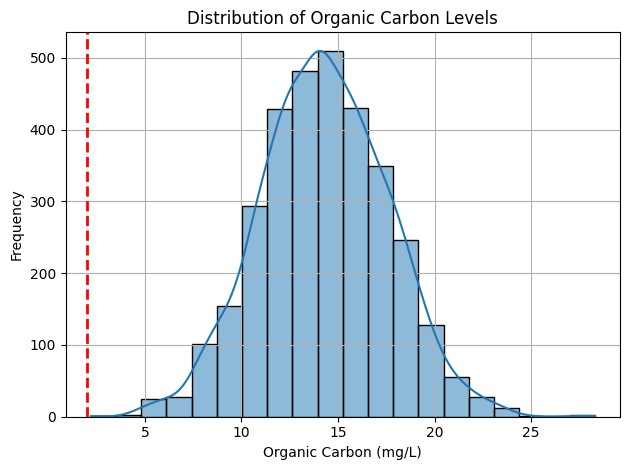

In [43]:
sns.histplot(data=df, x="Organic_carbon", kde=True, bins=20)
plt.axvline(x=2, color="red", linestyle="--", linewidth=2)
plt.title("Distribution of Organic Carbon Levels")
plt.xlabel("Organic Carbon (mg/L)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()


##### **📊 Organic Carbon Levels – Summary**

- **The distribution of Organic Carbon levels is centered around 13–15 mg/L with a symmetrical bell curve.**
- **Most readings fall in the 8–18 mg/L range, far above the standard safety threshold.**
- **The red vertical line marks the 2 mg/L safe upper limit — clearly showing that the majority of data exceeds it.**
- **The ideal range for Organic Carbon in potable water is 0–2 mg/L.**
- **This distribution reveals a significant deviation from safe water quality, indicating potential contamination risks.**
- **Although the dataset may not represent actual drinkable water standards, it effectively visualizes areas of concern.**


---

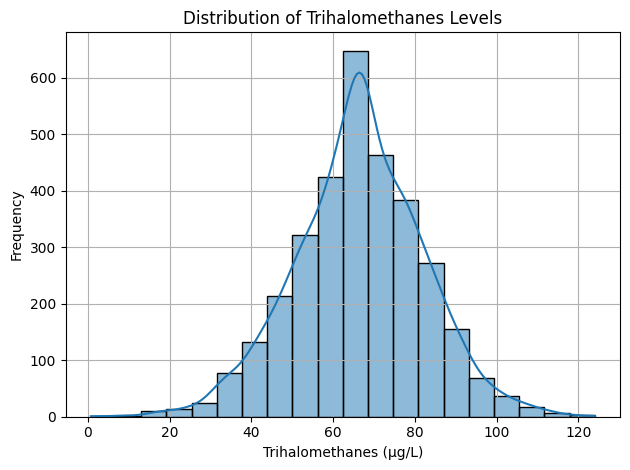

In [45]:
sns.histplot(data=df, x="Trihalomethanes", kde=True, bins=20)
plt.title("Distribution of Trihalomethanes Levels")
plt.xlabel("Trihalomethanes (μg/L)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


##### **📊 Trihalomethanes Levels – Summary**

- **The distribution is nearly normal and centered around 60 µg/L.**
- **Most values fall between 30–90 µg/L, with the bulk of the data staying below the 80 µg/L safety limit.**
- **The standard safe range for Trihalomethanes in drinking water is 0–80 µg/L.**
- **This makes Trihalomethanes one of the few features in the dataset that closely aligns with real-world potability standards.**
- **Its pattern indicates good water treatment control and offers practical value for real-life potability classification.**
- **Because this feature has a meaningful safety threshold, it could play a strong role in both EDA and ML-based risk prediction.**


---

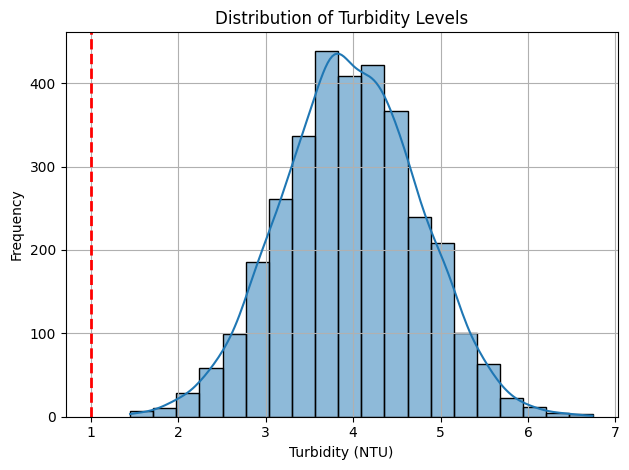

In [47]:
sns.histplot(data=df, x="Turbidity", kde=True, bins=20)
plt.axvline(x = 1, color= "red", linestyle= "--", linewidth = 2)
plt.title("Distribution of Turbidity Levels")
plt.xlabel("Turbidity (NTU)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

##### **📊 Turbidity Levels – Summary**

- **Turbidity values are centered around 4 NTU, significantly higher than the safe limit of 1 NTU.**
- **The distribution is roughly symmetric and bell-shaped, indicating stable but consistently high turbidity across the dataset.**
- **Only a small portion of samples fall within the acceptable safety threshold (≤1 NTU) — the red dashed line shows this limit.**
- **High turbidity suggests water contamination from particles or pathogens, which directly affects drinkability and health.**
- **In this dataset, Turbidity acts as a strong negative signal — if turbidity is high, potability is likely compromised.**
- **This variable needs careful thresholding or feature transformation in any classification model to reflect its actual health implications.**


---

In [55]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

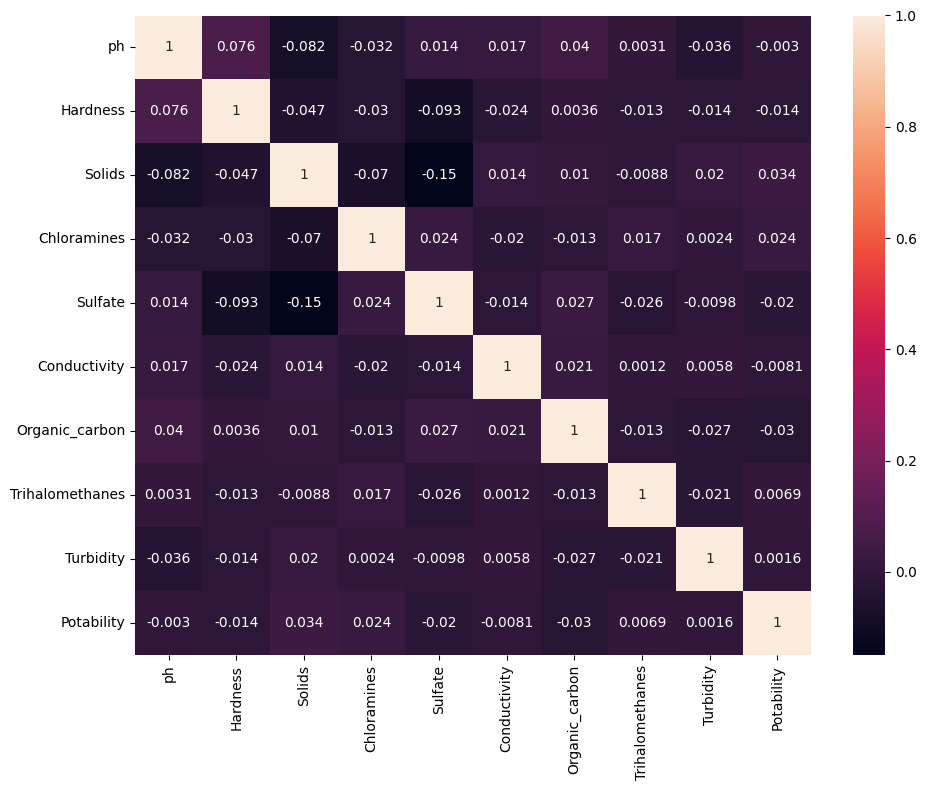

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(),annot=True)
plt.tight_layout()

---

### ✅ **Project Summary – Why We Stopped at EDA**
- **The dataset contained 9 features: `ph`, `Hardness`, `Solids`, `Chloramines`, `Sulfate`, `Conductivity`, `Organic_carbon`, `Trihalomethanes`, and `Turbidity`.**
- **Most columns like `Solids`, `Sulfate`, `Organic_carbon`, and `Turbidity` showed extremely unrealistic or unsafe values when compared to real-world standards.**
- **Many distributions appeared visually normal (Gaussian), but contextually they reflected unhealthy or unsafe ranges for human consumption or infrastructure.**
- **Only 3 features — `Conductivity`, `Trihalomethanes`, and `Hardness` — showed reliable distributions that aligned with actual water safety guidelines.**
- **Despite having a few usable features, we chose not to proceed with ML due to the poor data quality overall.**
- **Additionally, the target column `Potability` is highly imbalanced (64% labeled as Not Potable), making the model training unreliable.**
- **Hence, we limited this project to a clean, visual, and domain-backed exploratory data analysis.**

> 🧠 **Final Thought:**  
> **Choosing *not* to build an ML model is a sign of good judgment — when the data fails to meet quality standards, stopping at a well-documented EDA is the most honest and valuable outcome.**


-----